In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the preprocessed data

In [2]:
file_path = r"../data/EmoSounds.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

dataset                         fnames  genre splits vocals  \
0  Emo_Soundscapes  r_0human101979_1313063-hq.wav  human  train    Yes   
1  Emo_Soundscapes   r_0human102617_425689-hq.wav  human  train     No   
2  Emo_Soundscapes  r_0human106261_1707984-hq.wav  human  train    Yes   
3  Emo_Soundscapes     r_0human106568_7037-hq.wav  human  train    Yes   
4  Emo_Soundscapes  r_0human113598_1015240-hq.wav  human  train    Yes   

    arousal   valence  dynamics_rms_mean  dynamics_rms_std  pitch_pitch_mean  \
0 -0.518549  0.302556           0.013444          0.005903        375.990904   
1 -0.929101  0.564716           0.011291          0.008784        855.112001   
2 -0.940643  0.345425           0.000291          0.000261        494.090737   
3  0.475680  0.193735           0.052846          0.028216        739.893910   
4  0.901072  0.429514           0.087529          0.020352        630.302807   

   ...  timbre_lowenergy_mean  timbre_lowenergy_std  timbre_spectralflux_mean  \
0  ...               5.415367              1.558017                 10.204444   
1  ...               4.652187              0.537740                  9.799859   
2  ...               5.317143              1.175990                  0.310226   
3  ...               4.998831              1.429992                 45.529733   
4  ...               4.937357              1.028468                 67.812560   

   timbre_spectralflux_std  tonal_hcdf_mean  tonal_hcdf_std  \
0                 5.785453         0.244838        0.321193   
1                 8.441237         0.629594        0.341241   
2                 0.342690         0.451562        0.433910   
3                29.307053         0.337036        0.215957   
4                16.124870         0.195859        0.101366   

   tonal_keyclarity_mean  tonal_keyclarity_std  tonal_mode_mean  \
0               0.457834              0.171750        -0.043605   
1               0.440244              0.132387        -0.023940   
2               0.416266              0.162932        -0.032507   
3               0.465368              0.129338        -0.031692   
4               0.576344              0.150061        -0.086635   

   tonal_mode_std  
0        0.068892  
1        0.098591  
2        0.094219  
3        0.096302  
4        0.111011  

[5 rows x 75 columns]

# Clean data

In [4]:
df.isna().sum() 


dataset                  0
fnames                   0
genre                    0
splits                   0
vocals                   0
                        ..
tonal_hcdf_std           0
tonal_keyclarity_mean    0
tonal_keyclarity_std     0
tonal_mode_mean          0
tonal_mode_std           0
Length: 75, dtype: int64

In [5]:

unwanted_cols = ['dataset', 'fnames', 'genre', 'splits', 'vocals']
df = df.drop(unwanted_cols, axis=1)

# Verify the changes
print("Remaining columns:", df.columns)

Remaining columns: Index(['arousal', 'valence', 'dynamics_rms_mean', 'dynamics_rms_std',
       'pitch_pitch_mean', 'rhythm_attacktime_mean',
       'rhythm_eventdensity_mean', 'rhythm_fluctuationmax_peakposmean',
       'rhythm_pulseclarity_mean', 'rhythm_tempo_mean', 'rhythm_tempo_std',
       'spectral_brightness_mean', 'spectral_brightness_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_flatness_mean', 'spectral_flatness_std',
       'spectral_inharmonicity_mean', 'spectral_irregularity_mean',
       'spectral_kurtosis_mean', 'spectral_kurtosis_std',
       'spectral_mfcc_mean_1', 'spectral_mfcc_mean_10',
       'spectral_mfcc_mean_11', 'spectral_mfcc_mean_12',
       'spectral_mfcc_mean_13', 'spectral_mfcc_mean_2', 'spectral_mfcc_mean_3',
       'spectral_mfcc_mean_4', 'spectral_mfcc_mean_5', 'spectral_mfcc_mean_6',
       'spectral_mfcc_mean_7', 'spectral_mfcc_mean_8', 'spectral_mfcc_mean_9',
       'spectral_mfcc_std_1', 'spectral_mfcc_std_10', '

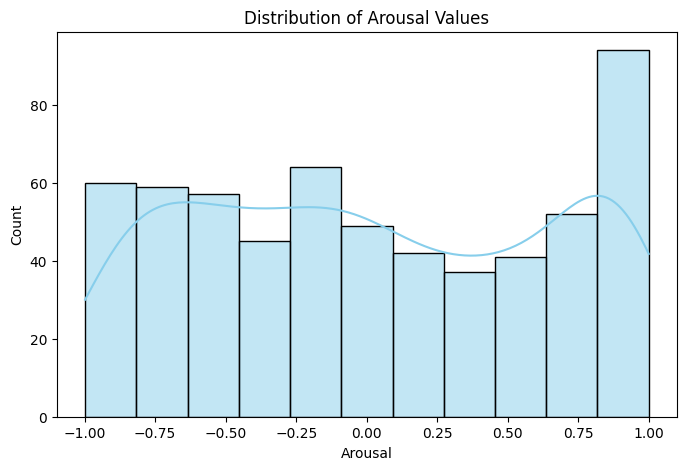

In [6]:

# Plot the distribution of "arousal"
plt.figure(figsize=(8, 5))
sns.histplot(df["arousal"], kde=True, color="skyblue")
plt.title("Distribution of Arousal Values")
plt.xlabel("Arousal")
plt.show()

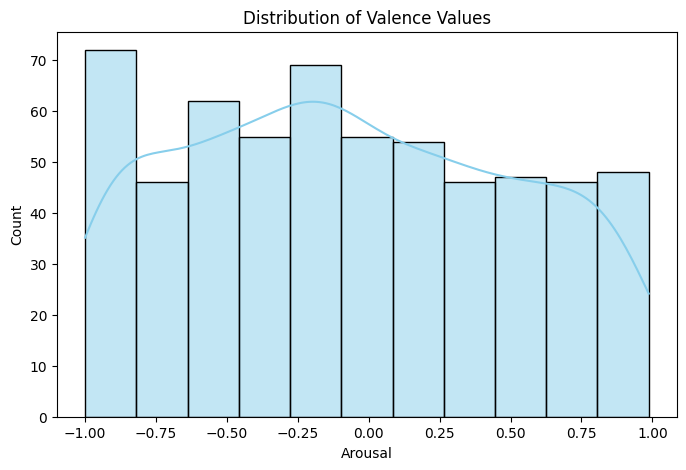

In [7]:

# Plot the distribution of "arousal"
plt.figure(figsize=(8, 5))
sns.histplot(df["valence"], kde=True, color="skyblue")
plt.title("Distribution of Valence Values")
plt.xlabel("Arousal")
plt.show()

# Apply Isolation Forest for Outlier Removal

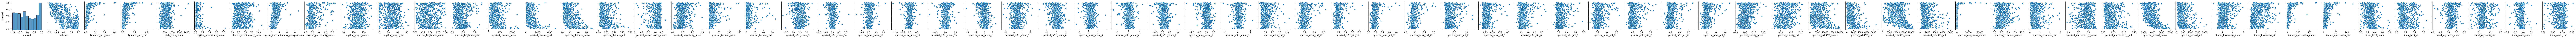

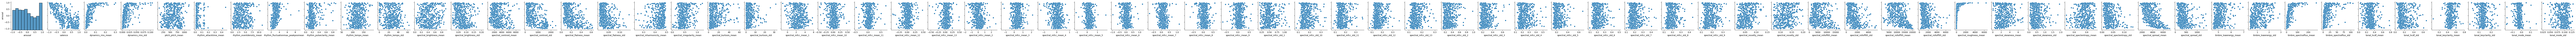

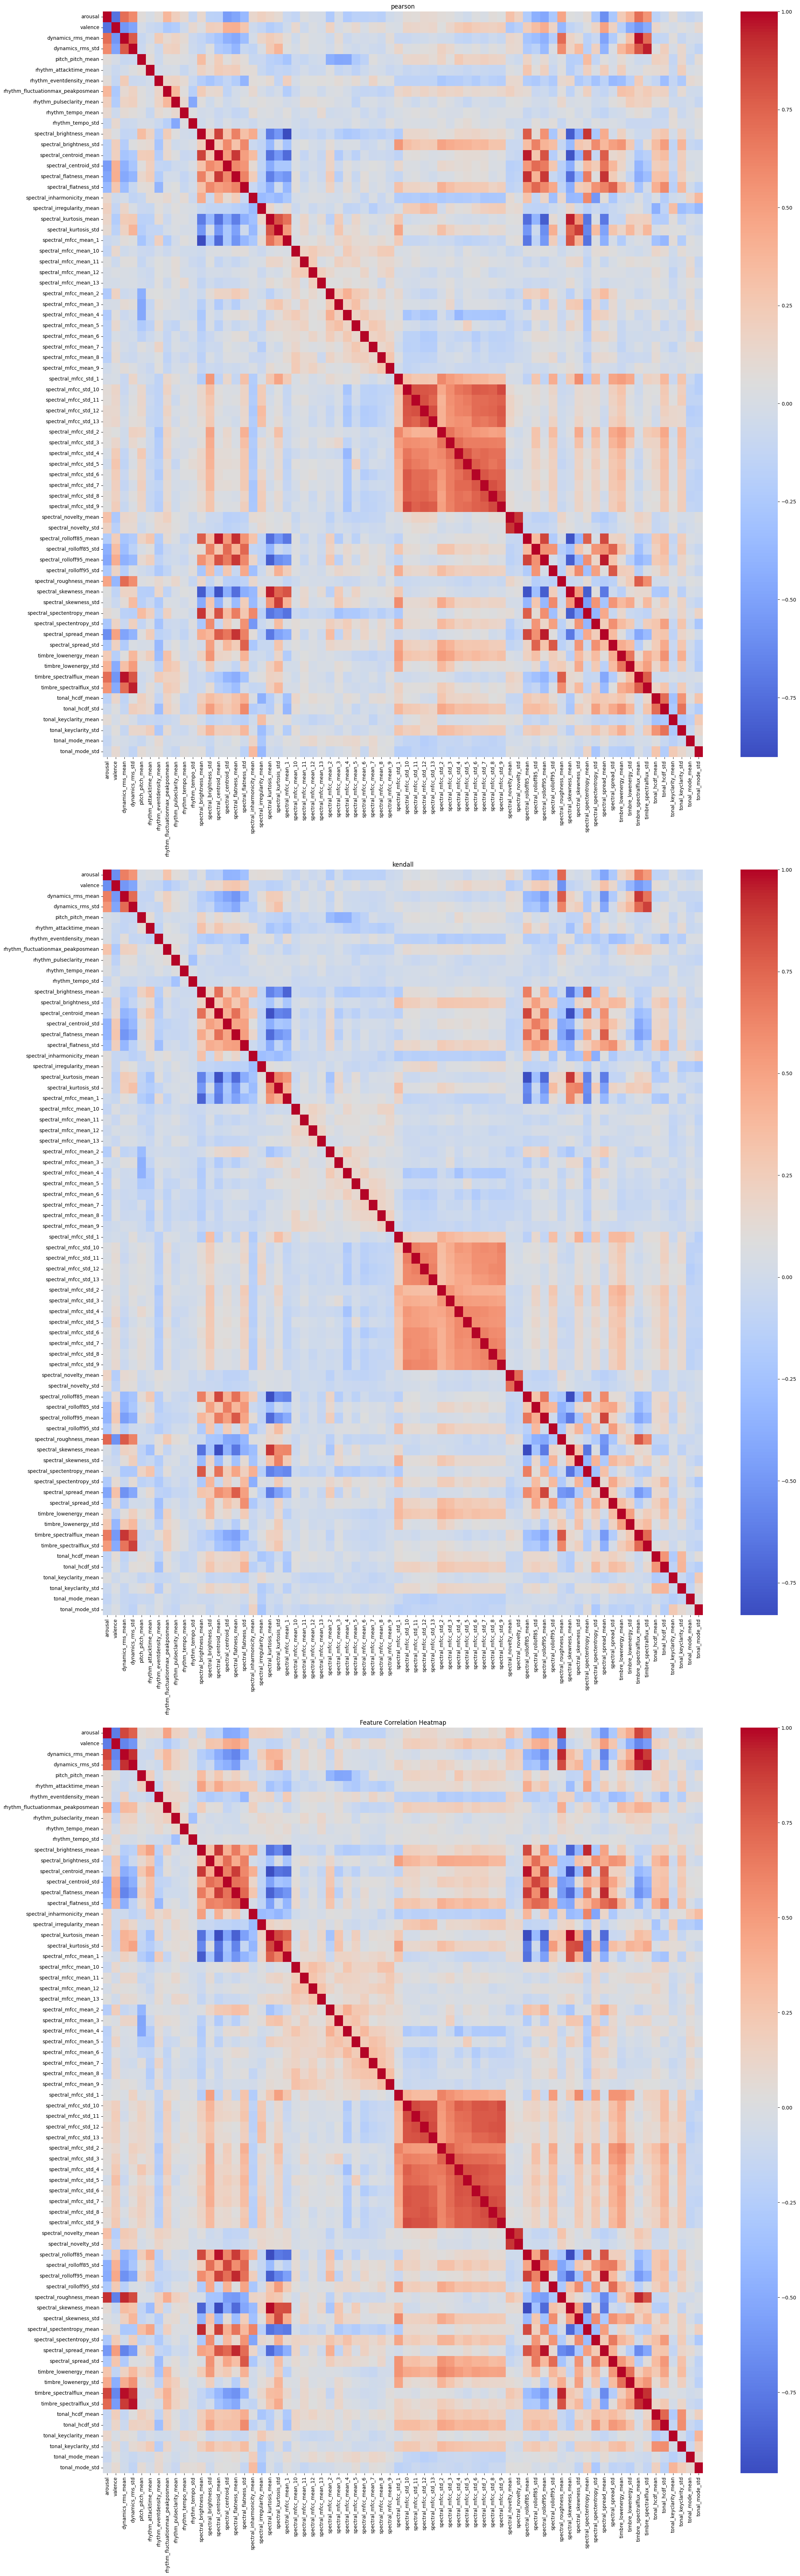

In [8]:
from sklearn.ensemble import IsolationForest

contamination = 0.2 # contamination=0.2 means 20% outliers expected

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=contamination, random_state=42)  # contamination=0.2 means 20% outliers expected

# Fit the model and predict outliers
outlier_preds = iso_forest.fit_predict(df)

# '1' indicates inliers (normal points), '-1' indicates outliers
df_no_outliers = df[outlier_preds == 1]  # Keep only normal points (inliers)



df.describe()

df_no_outliers.describe()



sns.pairplot(df , y_vars='arousal')
sns.pairplot(df_no_outliers , y_vars='arousal')

plt.show()


methods = ['pearson', 'kendall', 'spearman']
# Compute the correlation matrix
fig , axes = plt.subplots(3, 1 , figsize = (24 , 24 * 3))

for i, m in enumerate(methods) : 
        
    correlation_matrix = df_no_outliers.corr(method= m)
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False , ax = axes[i])
    axes[i].set_title(m)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



In [9]:
df = df_no_outliers
del df_no_outliers

# Creating Categories

In [10]:

# Function to categorize based on Arousal and Valence
def categorize_row(row):
    if row['arousal'] >= 0 and row['valence'] >= 0:
        return 'Class 1'  # Positive arousal, Positive valence
    elif row['arousal'] >= 0 and row['valence'] < 0:
        return 'Class 2'  # Positive arousal, Negative valence
    elif row['arousal'] < 0 and row['valence'] < 0:
        return 'Class 3'  # Negative arousal, Negative valence
    else:
        return 'Class 4'  # Negative arousal, Positive valence

In [11]:
# Apply function to DataFrame
df['Category'] = df.apply(categorize_row, axis=1)

In [19]:
df.to_csv("../data/imbalanced_preprocessed_1.csv" , index= False)

In [20]:
df.head()

arousal   valence  dynamics_rms_mean  dynamics_rms_std  pitch_pitch_mean  \
0 -0.518549  0.302556           0.013444          0.005903        375.990904   
1 -0.929101  0.564716           0.011291          0.008784        855.112001   
3  0.475680  0.193735           0.052846          0.028216        739.893910   
4  0.901072  0.429514           0.087529          0.020352        630.302807   
5 -0.815334  0.549876           0.004937          0.002017        403.411721   

   rhythm_attacktime_mean  rhythm_eventdensity_mean  \
0                0.016346                  1.145663   
1                0.016366                  2.127660   
3                0.020400                  3.600655   
4                0.015339                  3.764321   
5                0.022044                  0.818331   

   rhythm_fluctuationmax_peakposmean  rhythm_pulseclarity_mean  \
0                           2.833503                  0.136728   
1                           2.382534                  0.156985   
3                           3.233480                  0.471585   
4                           2.374726                  0.114023   
5                           2.660629                  0.177054   

   rhythm_tempo_mean  ...  timbre_lowenergy_std  timbre_spectralflux_mean  \
0         105.799224  ...              1.558017                 10.204444   
1         103.708910  ...              0.537740                  9.799859   
3         162.728967  ...              1.429992                 45.529733   
4         134.892943  ...              1.028468                 67.812560   
5         135.581084  ...              1.751029                  3.351369   

   timbre_spectralflux_std  tonal_hcdf_mean  tonal_hcdf_std  \
0                 5.785453         0.244838        0.321193   
1                 8.441237         0.629594        0.341241   
3                29.307053         0.337036        0.215957   
4                16.124870         0.195859        0.101366   
5                 1.879515         0.197610        0.262656   

   tonal_keyclarity_mean  tonal_keyclarity_std  tonal_mode_mean  \
0               0.457834              0.171750        -0.043605   
1               0.440244              0.132387        -0.023940   
3               0.465368              0.129338        -0.031692   
4               0.576344              0.150061        -0.086635   
5               0.501407              0.136241        -0.060317   

   tonal_mode_std  Category  
0        0.068892   Class 4  
1        0.098591   Class 4  
3        0.096302   Class 1  
4        0.111011   Class 1  
5        0.062196   Class 4  

[5 rows x 71 columns]

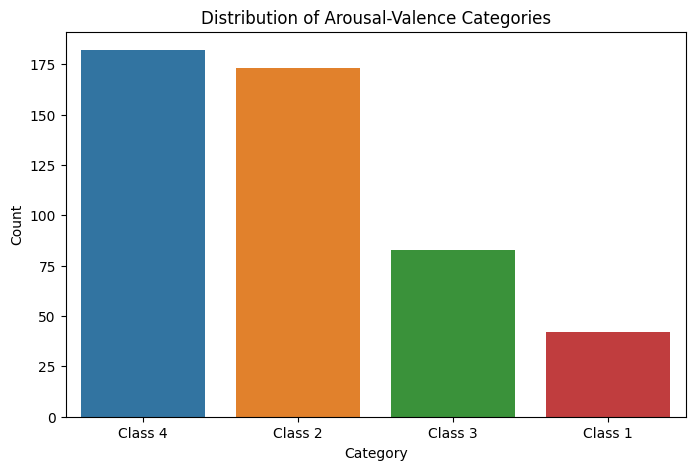

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values , hue= category_counts.index)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Arousal-Valence Categories')

# Show the plot
plt.show()

## Observation : 
This shows that the dataset is imbalanced. Hence we should use F1 score metric to evaluate the classification models.

In [23]:

df = pd.read_csv("../data/imbalanced_preprocessed_1.csv")

In [25]:
df.columns

Index(['arousal', 'valence', 'dynamics_rms_mean', 'dynamics_rms_std',
       'pitch_pitch_mean', 'rhythm_attacktime_mean',
       'rhythm_eventdensity_mean', 'rhythm_fluctuationmax_peakposmean',
       'rhythm_pulseclarity_mean', 'rhythm_tempo_mean', 'rhythm_tempo_std',
       'spectral_brightness_mean', 'spectral_brightness_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_flatness_mean', 'spectral_flatness_std',
       'spectral_inharmonicity_mean', 'spectral_irregularity_mean',
       'spectral_kurtosis_mean', 'spectral_kurtosis_std',
       'spectral_mfcc_mean_1', 'spectral_mfcc_mean_10',
       'spectral_mfcc_mean_11', 'spectral_mfcc_mean_12',
       'spectral_mfcc_mean_13', 'spectral_mfcc_mean_2', 'spectral_mfcc_mean_3',
       'spectral_mfcc_mean_4', 'spectral_mfcc_mean_5', 'spectral_mfcc_mean_6',
       'spectral_mfcc_mean_7', 'spectral_mfcc_mean_8', 'spectral_mfcc_mean_9',
       'spectral_mfcc_std_1', 'spectral_mfcc_std_10', 'spectral_mfcc_std_1